# Лабораторная работа 6

 ## 1. Построить интерполяционный многочлен Лагранжа. Вычичслить L4(x1 + x2). Построить график многочлена Лагранжа

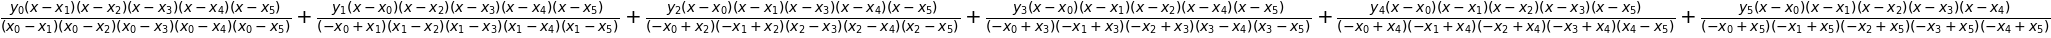

In [6]:
import numpy as np
from sympy import *

array = np.array([[0.172, 0.567, 1.113, 2.119, 2.769, 3.5],[-7.057, -5.703, -0.132, 1.423, 2.832, 1.5]])


x_val = symbols('x x0 x1 x2 x3 x4 x5')
y_val = symbols('y0 y1 y2 y3 y4 y5') 

expression = 0

index = 1

for y in y_val:
    temp_y = y
    x = x_val[0]
    x_next = x_val[index]
    
    for x_t in x_val:
        if (x_t == x_val[0] or x_t == x_next):
            continue
        temp_y *= (x - x_t)
    
    for x_t in x_val:
        if (x_t == x_val[0] or x_t == x_next):
            continue
        temp_y /= (x_next - x_t)
    
    index += 1
    expression += temp_y

init_printing()
expression

### Вычислим интерполяционный многочлен Лагранжа

In [7]:
expression2 = expression
for i in range(0, len(y_val)):
    expression = expression.subs(x_val[i + 1], array[0][i]).subs(y_val[i], array[1][i])
    

simplify(expression)

### L4(x1 + x2)

In [8]:
expression2 = expression2.subs(x_val[0], x_val[1] +  x_val[2])

for i in range(0, len(y_val)):
    expression2 = expression2.subs(x_val[i + 1], array[0][i]).subs(y_val[i], array[1][i])
    

expression2

### График

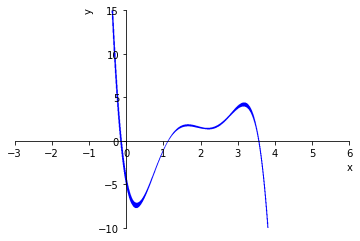

In [29]:
y = symbols('y')
p1 = plot_implicit(Eq(expression, y), (x, -3, 6), (y, -10, 15))

## 2. Построить таблиц конечных и разделенных членов

In [10]:
import pandas as pd


delta_y = ['-'] * 6
delta2_y = ['-'] * 6
delta3_y = ['-'] * 6
delta4_y = ['-'] * 6

for i in range(0, len(array[1]) - 1):
    delta_y[i] = (array[1][i + 1] - array[1][i])

for i in range(0, len(delta_y) - 2):
    delta2_y[i] = (delta_y[i + 1] - delta_y[i])

for i in range(0, len(delta2_y) - 3):
    delta3_y[i] = (delta2_y[i + 1] - delta2_y[i])

for i in range(0, len(delta3_y) - 4):
    delta4_y[i] = (delta3_y[i + 1] - delta3_y[i])

    
d = {'Xk': array[0], 'Yk': array[1], 
     'ΔYk':delta_y, 
     'Δ^2Yk': delta2_y, 
     'Δ^3Yk': delta3_y, 
     'Δ^4Yk': delta4_y}

df = pd.DataFrame(data=d)

df

,Xk,Yk,ΔYk,Δ^2Yk,Δ^3Yk,Δ^4Yk
0,0.172,-7.057,1.354,4.217,-8.233,12.103
1,0.567,-5.703,5.571,-4.016,3.87,-6.465
2,1.113,-0.132,1.555,-0.146,-2.595,-
3,2.119,1.423,1.409,-2.741,-,-
4,2.769,2.832,-1.332,-,-,-
5,3.500,1.500,-,-,-,-


### Таблица разделенных членов

In [11]:
yxx = ['-'] * 6
yxx2 = ['-'] * 6
yxx3 = ['-'] * 6
yxx4 = ['-'] * 6
yxx5 = ['-'] * 6

for i in range(0, len(array[1]) - 1):
    yxx[i] = (array[1][i + 1] - array[1][i]) / (array[0][i + 1] - array[0][i]) 

for i in range(0, len(array[1]) - 2):
    yxx2[i] = (yxx[i + 1] - yxx[i])/ (array[0][i + 2] - array[0][i])

for i in range(0, len(array[1]) - 3):
    yxx3[i] = (yxx2[i + 1] - yxx2[i])/ (array[0][i + 3] - array[0][i])

for i in range(0, len(array[1]) - 4):
    yxx4[i] = (yxx3[i + 1] - yxx3[i])/ (array[0][i + 4] - array[0][i])


for i in range(0, len(array[1]) - 5):
    yxx5[i] = (yxx4[i + 1] - yxx4[i])/ (array[0][i + 5] - array[0][i])

    
d = {'Xk': array[0], 'Yk': array[1],  
     '1-го порядка': yxx, 
     '2-го порядка': yxx2, 
     '3-го порядка': yxx3,
     '4-го порядка': yxx4,
     '5-го порядка': yxx5}

df = pd.DataFrame(data=d)

df

,Xk,Yk,1-го порядка,2-го порядка,3-го порядка,4-го порядка,5-го порядка
0,0.172,-7.057,3.42785,7.20026,-6.56322,3.56838,-1.48935
1,0.567,-5.703,10.2033,-5.57833,2.70387,-1.38819,-
2,1.113,-0.132,1.54573,0.375584,-1.3677,-,-
3,2.119,1.423,2.16769,-2.8891,-,-,-
4,2.769,2.832,-1.82216,-,-,-,-
5,3.500,1.500,-,-,-,-,-


## 3. Построить полином Ньютона и вычислить для него значение N4(x1+x2). Построить график многочлена ньютона

In [12]:
expression3 = y_val[0]

expression3 += yxx[0] * (x_val[0] - x_val[1])   
expression3 += yxx2[0] * (x_val[0] - x_val[1]) * (x_val[0] - x_val[2])   

expression3 += yxx3[0] * (x_val[0] - x_val[1]) * (x_val[0] - x_val[2]) * (x_val[0] - x_val[3])   

expression3 += yxx4[0] * (x_val[0] - x_val[1]) * (x_val[0] - x_val[2]) * (x_val[0] - x_val[3]) * (x_val[0] - x_val[4])

expression3 += yxx5[0] * (x_val[0] - x_val[1]) * (x_val[0] - x_val[2]) * (x_val[0] - x_val[3]) * (x_val[0] - x_val[4])\
                * (x_val[0] - x_val[5])


expression3

In [13]:
expression4 = expression3
for i in range(0, len(y_val)):
    expression3 = expression3.subs(x_val[i + 1], array[0][i]).subs(y_val[i], array[1][i])
    

simplify(expression3)

### N4(x1+x2)

In [14]:
expression4 = expression4.subs(x_val[0], x_val[1] +  x_val[2])

for i in range(0, len(y_val)):
    expression4 = expression4.subs(x_val[i + 1], array[0][i]).subs(y_val[i], array[1][i])


expression4

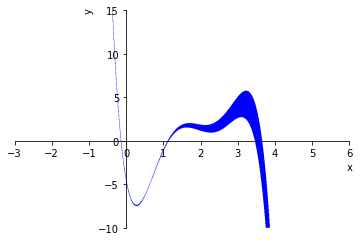

In [15]:
y = symbols('y')
p1 = plot_implicit(Eq(expression3, y), (x, -3, 6), (y, -10, 15))

## 4. Построить интерполяционные сплайны кусочно-линейный и кусочно-квадратичный. Построить графики сплайнов 

y = 3.4278481012658233 * x + -7.646589873417722
y = 10.203296703296704 * x + -11.48826923076923
y = 1.5457256461232602 * x + -1.8523926441351888
y = 2.167692307692308 * x + -3.1703400000000004
y = -1.8221614227086185 * x + 7.877564979480165


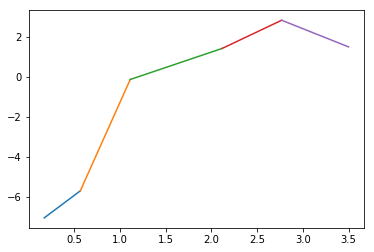

In [16]:
from IPython.display import clear_output
import matplotlib.pyplot as plt

plot_linear()

In [25]:
def plot_linear():
    for i in range(0, len(array[1]) - 1):    
        a1 = (array[1][i + 1] - array[1][i]) / (array[0][i + 1] - array[0][i])  
        a0 = array[1][i] - a1 * array[0][i]

        print('y = ' + str(a1) + ' * x + ' + str(a0))

        x = np.linspace(array[0][i],array[0][i + 1])
        plt.plot(x, a1 * x + a0)

### Кусочно-квадратичный интерполяционный сплайн

y = -6.944391308630836 + -1.8931471345480126x + 7.200264189193284x^2
y = -15.008592700241847 + 19.574894239412284x + -5.578331866735464x^2
y = -0.9665983161898182 + 0.3318390216116909x + 0.3755837328315499x^2
y = -20.122194200954716 + 16.289636575758728x + -2.8891048011592515x^2


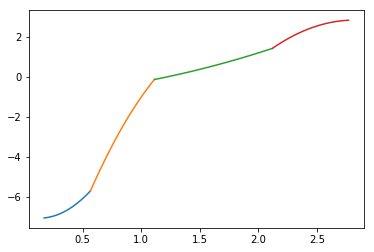

In [28]:
p1 = None 

X = array[0] 
Y = array[1]
plot_square()

In [27]:
def plot_square():
    for i in range(0, len(array[1]) - 2):
        a2 = (Y[i + 2] - Y[i]) / ((X[i + 2] - X[i]) * (X[i + 2] - X[i + 1])) - \
        ((Y[i + 1] - Y[i]) / ((X[i + 1] - X[i]) * (X[i + 2] - X[i + 1])))

        a1 = (Y[i + 1] - Y[i]) / (X[i + 1] - X[i]) - a2 * (X[i + 1] + X[i])  
        a0 = Y[i] - a1 * X[i] - a2 * (X[i])**2 


        print('y = ' + str(a0) + ' + ' + str(a1) + 'x + ' + str(a2) + 'x^2')

        x = np.linspace(X[i],X[i + 1])
        plt.plot(x, a0 + a1 * x + a2 * x ** 2)

### Кубический интерполяционный сплайн

In [26]:
a = Y[1:]
b = np.array([0.0 for i in range(0, len(X) - 1)])
c = np.array([0.0 for i in range(0, len(X) - 1)])
d = np.array([0.0 for i in range(0, len(X) - 1)])

hk = np.array([X[i] - X[i - 1] for i in range(1, len(X))])
lk = np.array([(Y[i] - Y[i - 1]) / hk[i - 1] for i in range(1, len(X))])

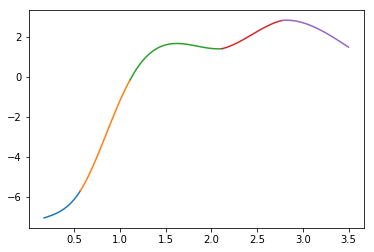

In [29]:
de =  np.array([0.0 for i in range(0, len(X) - 2)])
lambd =  np.array([0.0 for i in range(0, len(X) - 2)])

de[0] = -0.5 * hk[1] / (hk[0] + hk[1])
lambd[0] = 1.5 * (lk[1] - lk[0]) / (hk[0] + hk[1])

for i in range(1, len(X) - 2):
    de[i] = - hk[i + 1] / (2 * hk[i] + 2 * hk[i + 1] + hk[i] * de[i - 1])
    lambd[i] = (2 * lk[i + 1] - 3 * lk[i] - hk[i] * lambd[i - 1]) /(2 * hk[i] + 2 * hk[i + 1] + hk[i] * de[i - 1])

for i in range(len(X) - 3, -1, -1):
    c[i] = de[i] * c[i + 1] + lambd[i]

for i in range(len(X) - 2, -1, -1):
    b[i] = lk[i]+ 2 / 3 * c[i] * hk[i] + 1 / 3 * hk[i] * c[i-1]
    d[i] = (c[i] - c[i-1]) / (3 * hk[i])

plot_cube()

In [28]:
def plot_cube():
    for i in range(0, len(X) - 1):
        x = np.linspace(X[i], X[i + 1])
        plt.plot(x, a[i] + b[i] * (x - X[i + 1]) + c[i] * (x - X[i + 1])**2 + d[i] * (x - X[i + 1])**3)

## 6. На одном чертеже с графиком полиномов построить графики сплайнов

In [30]:
def L_x(x):
    return float(str(expression.subs(x_val[0], x)))

def N_x(x):
    return float(str(expression3.subs(x_val[0], x)))

y = -6.944391308630836 + -1.8931471345480126x + 7.200264189193284x^2
y = -15.008592700241847 + 19.574894239412284x + -5.578331866735464x^2
y = -0.9665983161898182 + 0.3318390216116909x + 0.3755837328315499x^2
y = -20.122194200954716 + 16.289636575758728x + -2.8891048011592515x^2
y = 3.4278481012658233 * x + -7.646589873417722
y = 10.203296703296704 * x + -11.48826923076923
y = 1.5457256461232602 * x + -1.8523926441351888
y = 2.167692307692308 * x + -3.1703400000000004
y = -1.8221614227086185 * x + 7.877564979480165


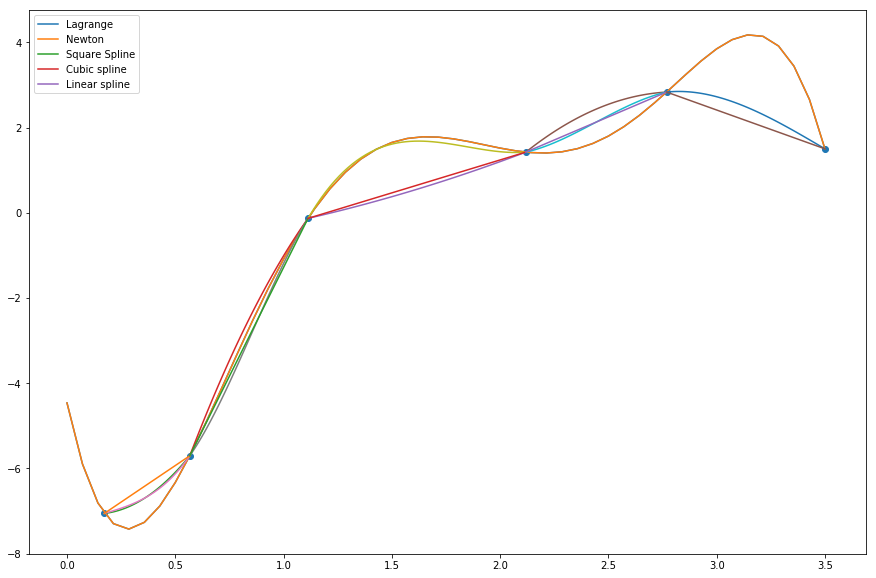

In [31]:
_, fullPlot = plt.subplots(figsize=(15, 10))

x2 = np.linspace(0, 3.5)
y2 = [L_x(a) for a in x2]
plt.plot(x2, y2)

y2 = [N_x(a) for a in x2]

plt.plot(x2, y2)

plot_square()
plot_cube()
plot_linear()

plt.scatter(X, Y)
plt.legend(['Lagrange', 'Newton', 'Square Spline', 'Cubic spline', 'Linear spline'])
plt.show()